In [6]:
import time, os, sys
os.environ['OMP_NUM_THREADS']="1"
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['OMP_NUM_THREADS']='1'
os.environ['MKL_NUM_THREADS']='1'
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
import glob
import os
from cellpose import models, io

In [7]:
dapi_dir = '/data/petar/fgf1/resolve/32810-1377-slide3_submission/'

In [8]:
[x for x in os.listdir(dapi_dir) if 'DAPI' in x]

['32810-1377-slide3_D2-1_DAPI.tiff',
 '32810-1377-slide3_B1-1_DAPI.tiff',
 '32810-1377-slide3_C1-1_DAPI.tiff',
 '32810-1377-slide3_C2-1_DAPI.tiff',
 '32810-1377-slide3_B2-1_DAPI.tiff',
 '32810-1377-slide3_A1-1_DAPI.tiff',
 '32810-1377-slide3_D1-1_DAPI.tiff',
 '32810-1377-slide3_A2-1_DAPI.tiff']

In [9]:
images = glob.glob(dapi_dir)
# Looping through list to find "Brain" index and retrieving 6th to 11th string from there which should be brain A-H underscore 1-6 + A/B/AB
# Looping through list to find "Brain" index and retrieving 12th to the 4th last string which should be the channel name
section = []
for b in range(len(images)):
    section.append((images[b][(images[b].find("DAPI") + 6):(images[b].find("Brain") + 11)]).rstrip("_"))
mice = list(dict.fromkeys(section))

In [10]:
image_paths = [dapi_dir + x for x in os.listdir(dapi_dir) if 'DAPI' in x]
image_paths

['/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_D2-1_DAPI.tiff',
 '/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_B1-1_DAPI.tiff',
 '/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_C1-1_DAPI.tiff',
 '/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_C2-1_DAPI.tiff',
 '/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_B2-1_DAPI.tiff',
 '/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_A1-1_DAPI.tiff',
 '/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_D1-1_DAPI.tiff',
 '/data/petar/fgf1/resolve/32810-1377-slide3_submission/32810-1377-slide3_A2-1_DAPI.tiff']

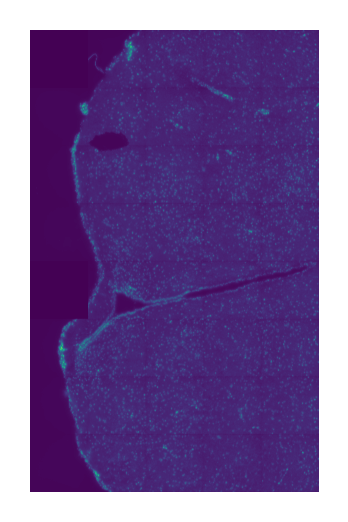

In [11]:
plt.figure(figsize=(2,2))
plt.imshow(io.imread(image_paths[0]))
plt.axis('off')
plt.show()

In [13]:
model = models.Cellpose(gpu=True, model_type='cyto2')
channels = [[0,0]]

In [14]:
img = io.imread(image_paths[0])

In [15]:
masks, flows, styles, diams = model.eval(img, diameter=70, channels=channels)

In [16]:
diams

70

In [18]:
masks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [20]:
list(np.flatten(masks))

AttributeError: module 'numpy' has no attribute 'flatten'

In [26]:
np.unique(masks)

array([   0,    1,    2, ..., 3664, 3665, 3666], dtype=uint16)

In [29]:
np.unique(masks[1000])

array([  0, 141, 146, 148, 149, 150, 151, 152, 153, 154, 155],
      dtype=uint16)

In [30]:
io.masks_flows_to_seg(img, masks, flows, diams, 'section'+'_DAPI', channels)

In [37]:
io.save_to_png(img, masks, flows, 'section'+'_DAPI')

KeyboardInterrupt: 

In [ ]:
section = image_paths[0]

In [44]:
cp = np.load('section_DAPI_seg.npy', allow_pickle=True).item()

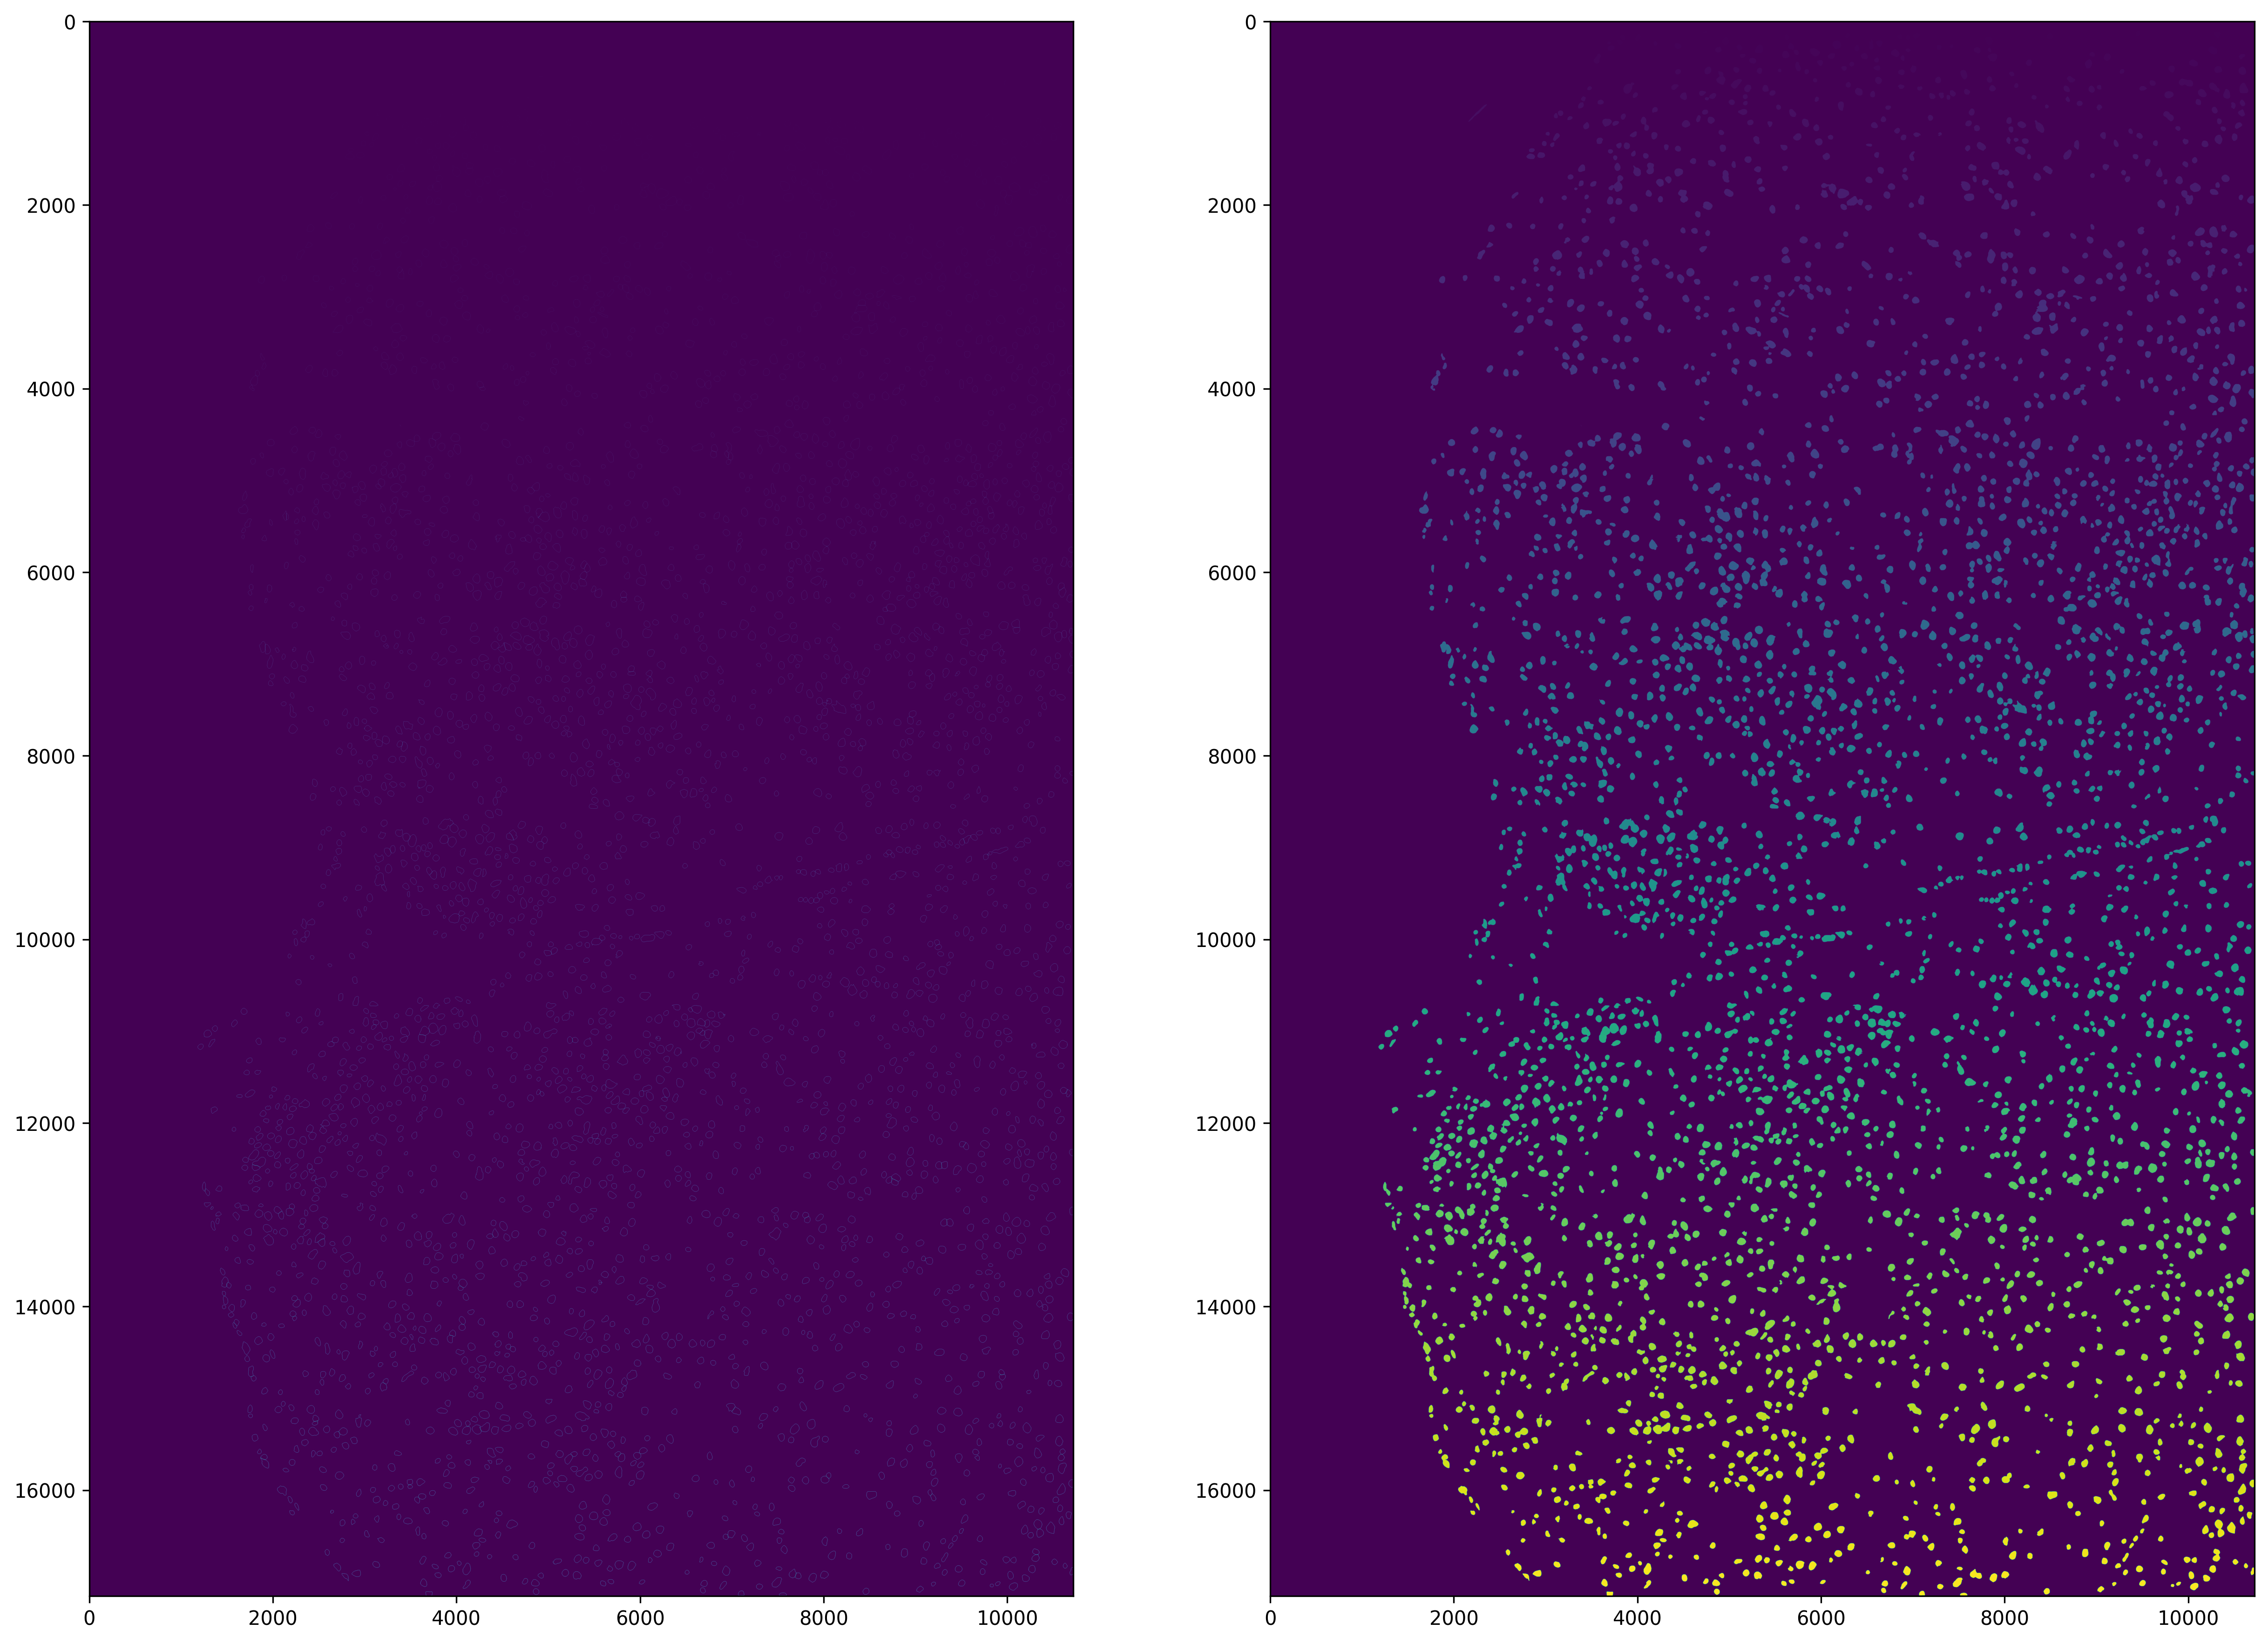

In [42]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(cp['outlines'])
plt.subplot(122)
plt.imshow(cp['masks'])

In [43]:
cp['colors']

KeyError: 'colors'

In [ ]:
cp['masks']

In [50]:
np.unique(cp['masks'][0])

array([0, 1, 2, 3], dtype=uint16)

In [51]:
np.shape(cp['masks'][0])

(10720,)

In [64]:
cell_idx = 666
print(len([x for x in cp['masks'][cell_idx].tolist() if x == 0]))
print(len([x for x in cp['masks'][cell_idx].tolist() if x == 1]))
print(len([x for x in cp['masks'][cell_idx].tolist() if x == 2]))
print(len([x for x in cp['masks'][cell_idx].tolist() if x == 3]))

10166
0
0
0


In [67]:
len(cp['masks'])

17152

In [47]:
[len(np.nonzero(x)) for x in cp['masks']]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [68]:
np.shape(cp['masks'])

(17152, 10720)